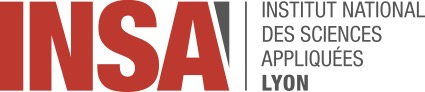
# P2I7: Chapitre 3 méthodes numériques
## Schémas à un pas et consistence
Camille Carvalho (INSA/ICJ)

Pendant cette séance on considère le problème de Cauchy correspondant au pendule non amorti (non linéarisé) :
$$
   \ddot{\theta}(t) = -\frac{g}{\ell}\sin(\theta(t)), ~~~\mbox{ pour } t \ge 0, \quad \theta(0) = \alpha, ~~ \dot{\theta}(0) = 0,
$$
où $\alpha$ est l'angle initial auquel on lâche le pendule à l'instant initial $t=0$ avec une vitesse nulle.


# Exercice 3.6.1
Détaillez la stratégie de point fixe pour le schéma du point milieu et pour le problème du pendule ci-dessus.

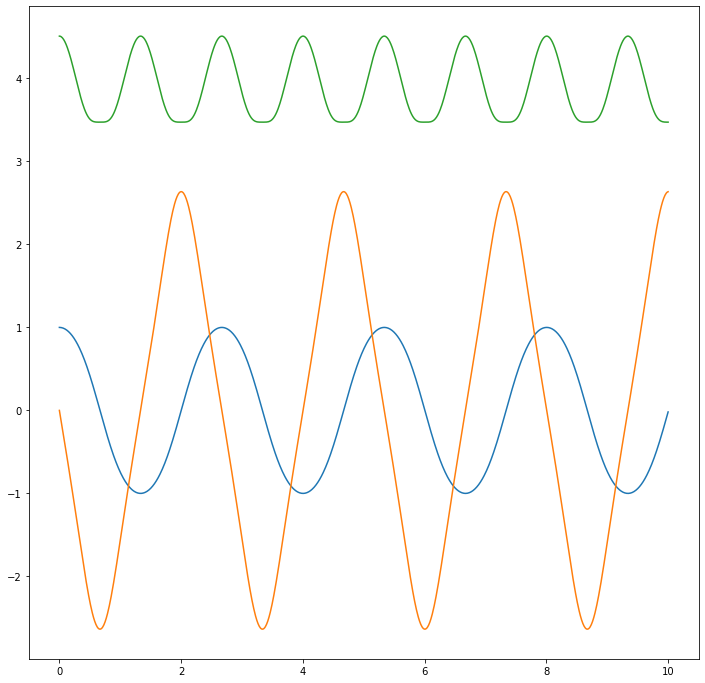

In [50]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt

g = 9.81 # m.s-1
l = 1 # longueur de la tige
α = 1 # angle(rad) initial
N = 1000 # nombre de temps
T = 10 # temps s
dt = T/N # pas de temps

Y = np.zeros((N, 2))
Y[0] = np.array([α, 0]) # theta0 et theta point 0
Ypoint = np.zeros((N, 2))
Ypoint[0] = np.array([Y[0][1], -(g/l)*sin(Y[0][0])])

#schéma point milieu : Yi+1 = Yi + dt * F(Yi+1+Yi/2)
for i in range(1, N):
    yi = Y[i-1]; ypi = Ypoint[i-1]
    while True:
        savei, savepi = yi[0], yi[1]
        yi, ypi = Y[i-1] + dt*(Ypoint[i-1] + ypi)/2, Ypoint[i-1] - dt*(g/l)*sin(Y[i-1] + yi)/2
        if abs(yi[0]-savei) + abs(yi[1]-savepi) < 1e-6:
            break
        elif j > 100:
            raise NameError("Pas de convergence.")
        else:
            continue
        j += 1
        

    Y[i] = yi
    Ypoint[i] = ypi

energie = (Ypoint**2)/2 + (g/l)*(1-cos(Y))    
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(np.linspace(0, int(N*dt), N), Y[:,0])
ax.plot(np.linspace(0, int(N*dt), N), Ypoint[:,0])
ax.plot(np.linspace(0, int(N*dt), N), energie[:,0])
    
        
    


# Section 3.8: pratique
Implémentez le shéma du point milieu sur le problème du pendule ci-dessus. Vous pourrez dessiner l'évolution de l'énergie totale qui à l'expression $\frac{\dot{\theta}^2(t)}{2} + \frac{g}{\ell}(1-\cos(\theta(t)))$. Si vous avez le temps, comparez également les résultats numériques obtenus avec le schéma du point milieu avec ceux obtenus avec un schéma de Verlet et de RK4.
